In [3]:
!pip install pandas-datareader 
# install pandas-datareader

In [14]:
#Example 11.9 Get Stock Data from Yahoo
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
symbol = 'TSLA' #'AMZN','AAPL', 'GOOGL' ,'MSFT', 'FB', 'TWTR','TSLA','INTC','CSCO','NVDA','AMD','NFLX','BABA','BA','BAC','C','CAT','CVX','DIS','DD','XOM','GE','GS','HD','IBM','JNJ','JPM','KO','MCD','MMM','MRK','PFE','PG','TRV','UTX','UNH','VZ','WMT','WFC','WYNN'

data_source='yahoo' #'google'
start_date = '2019-01-01'
end_date = '2022-01-01'
df = data.DataReader(symbol, data_source, start_date, end_date)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,63.026001,59.759998,61.220001,62.023998,58293000.0,62.023998
2019-01-03,61.880001,59.476002,61.400002,60.071999,34826000.0,60.071999
2019-01-04,63.599998,60.546001,61.200001,63.537998,36970500.0,63.537998
2019-01-07,67.348000,63.549999,64.344002,66.991997,37756000.0,66.991997
2019-01-08,68.802002,65.403999,68.391998,67.070000,35042500.0,67.070000


In [17]:
close = df['Close']
close.head(10)


Date
2019-01-02    62.023998
2019-01-03    60.071999
2019-01-04    63.537998
2019-01-07    66.991997
2019-01-08    67.070000
2019-01-09    67.706001
2019-01-10    68.994003
2019-01-11    69.452003
2019-01-14    66.879997
2019-01-15    68.886002
Name: Close, dtype: float64

In [20]:
close.describe()


count     757.000000
mean      374.787040
std       330.868759
min        35.793999
25%        62.442001
50%       241.731995
75%       670.000000
max      1229.910034
Name: Close, dtype: float64

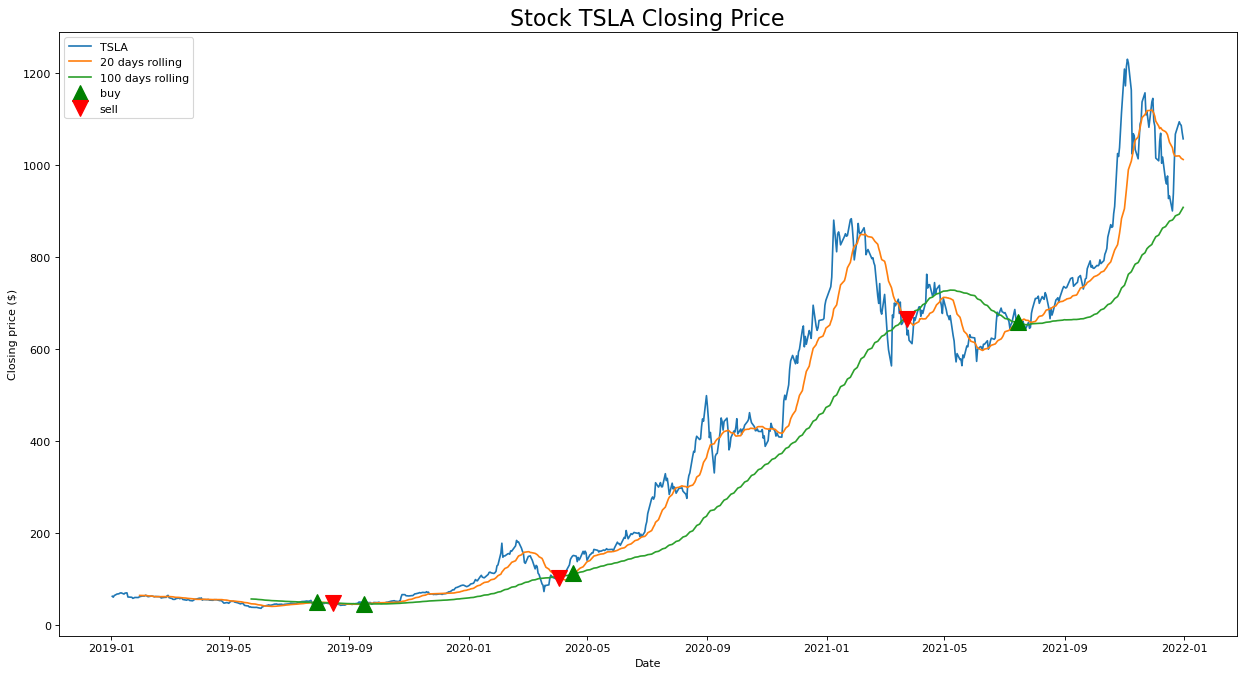

In [24]:
# Calculate the 20 and 100 days moving averages
short_rolling = close.rolling(window=20).mean() #20 days rolling average of close
long_rolling = close.rolling(window=100).mean() #100 days rolling average of close
from pandas.plotting import register_matplotlib_converters #register_matplotlib_converters() is used to fix the date format
register_matplotlib_converters() 
# Calculate the 'buy' and 'sell' signals and positions
df['Signal'] = 0.0
df['Signal'] = np.where(short_rolling > long_rolling, 1.0, 0.0) #1.0 means buy, 0.0 means sell np.where(condition, true_value, false_value)
df['Position'] = df['Signal'].diff() #diff() is used to calculate the position 
# Plot the data
fig, ax = plt.subplots(figsize=(19, 10), dpi=80, facecolor='w', edgecolor='k',
                       )  # figsize is used to set the size of the figure
# create plot subsplot size and title 
ax.set_title('Stock ' + symbol + ' Closing Price', fontsize=20)
ax.plot(close.index, close, label=symbol) #plot the close price
ax.plot(short_rolling.index, short_rolling, label='20 days rolling') #plot the 20 days rolling average
ax.plot(long_rolling.index, long_rolling, label='100 days rolling') #plot the 100 days rolling average
# plot 'buy' signals
plt.plot(df[df['Position'] == 1].index,
 short_rolling[df['Position'] == 1],
 '^', markersize = 15, color = 'g', label = 'buy') #plot the buy signal
# plot 'sell' signals
plt.plot(df[df['Position'] == -1].index, 
 short_rolling[df['Position'] == -1],
 'v', markersize = 15, color = 'r', label = 'sell') #plot the sell signal
ax.set_xlabel('Date') #set the x-axis label  'Date'
ax.set_ylabel('Closing price ($)') #set the y-axis label 'Closing price ($)'
ax.legend() #show the legend
plt.show()
